<a href="https://colab.research.google.com/github/JabulaniMcineka/MyProjects/blob/main/DeliverDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import sqlite3

# Connect to SQLite (creates file if not exists)
conn = sqlite3.connect("Delivery.db")
cur = conn.cursor()

# Create Deliveries table
cur.execute("""
CREATE TABLE IF NOT EXISTS Deliveries (
    delivery_id VARCHAR(10) PRIMARY KEY,
    city VARCHAR(50),
    customer_id INT,
    scheduled_datetime DATETIME,
    delivered_datetime DATETIME,
    status VARCHAR(20),
    delay_minutes INT,
    carrier VARCHAR(50),
    distance_km INT,
    weight_kg DECIMAL(10,2)
);
""")

conn.commit()




In [24]:
import pandas as pd

In [25]:
# Load CSVs into DataFrames
df_deliveries = pd.read_csv("delivery_data.csv")

# Insert into tables
df_deliveries.to_sql("delivery_data", conn, if_exists="append", index=False)


250

In [26]:
pd.read_sql("SELECT * FROM Deliveries", conn)

,delivery_id,city,customer_id,scheduled_datetime,delivered_datetime,status,delay_minutes,carrier,distance_km,weight_kg
0,D00001,Cape Town,15390,2025-06-12 13:00:00,2025-06-13 07:55:00,Delivered,31,SwiftX,135,1.5
1,D00002,Bloemfontein,16949,2025-05-02 17:00:00,2025-05-02 22:36:00,Delivered,0,MegaHaul,1342,26.5
2,D00003,Cape Town,18666,2025-06-28 15:00:00,2025-06-29 04:39:00,Delivered,60,SwiftX,194,5.0
3,D00004,Durban,17734,2025-06-21 14:00:00,2025-06-22 10:14:00,Delivered,0,MegaHaul,651,8.9
4,D00005,Johannesburg,18792,2025-06-29 07:00:00,2025-06-29 20:56:00,Delivered,0,MegaHaul,960,6.5
...,...,...,...,...,...,...,...,...,...,...
245,D00246,Bloemfontein,13537,2025-05-02 10:00:00,2025-05-02 19:01:00,Delivered,19,SwiftX,1435,42.1
246,D00247,Pretoria,11724,2025-06-02 13:00:00,2025-06-02 23:15:00,Delivered,41,SkyDrop,23,8.0
247,D00248,Johannesburg,19496,2025-06-06 13:00:00,2025-06-06 20:01:00,Delivered,0,MegaHaul,133,37.2
248,D00249,Gqeberha,15343,2025-06-11 07:00:00,2025-06-11 15:52:00,Delivered,0,MegaHaul,306,31.0


In [28]:
df = pd.read_sql("""
SELECT * from Deliveries

""", conn)

df.head()

,delivery_id,city,customer_id,scheduled_datetime,delivered_datetime,status,delay_minutes,carrier,distance_km,weight_kg
0,D00001,Cape Town,15390,2025-06-12 13:00:00,2025-06-13 07:55:00,Delivered,31,SwiftX,135,1.5
1,D00002,Bloemfontein,16949,2025-05-02 17:00:00,2025-05-02 22:36:00,Delivered,0,MegaHaul,1342,26.5
2,D00003,Cape Town,18666,2025-06-28 15:00:00,2025-06-29 04:39:00,Delivered,60,SwiftX,194,5.0
3,D00004,Durban,17734,2025-06-21 14:00:00,2025-06-22 10:14:00,Delivered,0,MegaHaul,651,8.9
4,D00005,Johannesburg,18792,2025-06-29 07:00:00,2025-06-29 20:56:00,Delivered,0,MegaHaul,960,6.5


In [29]:
# Count missing values
df.isnull().sum()

,0
delivery_id,0
city,0
customer_id,0
scheduled_datetime,0
delivered_datetime,0
status,0
delay_minutes,0
carrier,0
distance_km,0
weight_kg,0


In [32]:
# 2. Fill missing delay_minutes with 0 (assuming no delay if missing)
df["delay_minutes"].fillna(0, inplace=True)

/tmp/ipython-input-3431635970.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["delay_minutes"].fillna(0, inplace=True)


In [33]:
# 3. Fill missing weight_kg with the median
df["weight_kg"].fillna(df["weight_kg"].median(), inplace=True)

/tmp/ipython-input-112298893.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["weight_kg"].fillna(df["weight_kg"].median(), inplace=True)


In [34]:

# 4. Fill missing distance_km with the mean
df["distance_km"].fillna(df["distance_km"].mean(), inplace=True)

/tmp/ipython-input-3172236661.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["distance_km"].fillna(df["distance_km"].mean(), inplace=True)


In [35]:
# 5. Drop rows with missing delivery_id (key column — must exist)
df.dropna(subset=["delivery_id"], inplace=True)


In [36]:
# 6. (Optional) Re-check for any missing values
print(df.isnull().sum())


delivery_id           0
city                  0
customer_id           0
scheduled_datetime    0
delivered_datetime    0
status                0
delay_minutes         0
carrier               0
distance_km           0
weight_kg             0
dtype: int64


Here’s a **brief summary** of the SQL queries you can run on your deliveries data:

**Total deliveries** – Count all deliveries in the dataset.

**Deliveries per city** – See which cities have the most deliveries.

**Average delay** – Calculate the mean delivery delay in minutes.

**Deliveries by carrier** – Count deliveries handled by each carrier.

**Average** distance per city – See how far deliveries typically travel in each city.

**Total weight per carrier** – Sum of all packages delivered by each carrier.

**Delayed deliveries** – List deliveries with a delay greater than 0 minutes.

**Average delivery time** – Calculate average delivery duration in hours.

**Longest distance deliveries** – Identify deliveries that cover the greatest distance.

**Monthly delivery trends** – Track deliveries per month.

**Average weight per city** – Average package weight per city.

**Carrier performance** – Average delay by carrier to evaluate efficiency.

**These queries give a quick overview of delivery volume, performance, distance, and weight metrics for analysis.**

In [52]:
# 1. Total deliveries
total_deliveries = pd.read_sql("""
    SELECT COUNT(*) AS total_deliveries
    FROM deliveries
""", conn)
print(total_deliveries)

# 2. Deliveries per city
deliveries_per_city = pd.read_sql("""
    SELECT city, COUNT(*) AS num_deliveries
    FROM deliveries
    GROUP BY city
    ORDER BY num_deliveries DESC
""", conn)
print(deliveries_per_city)

# 3. Average delay (minutes)
avg_delay = pd.read_sql("""
    SELECT AVG(delay_minutes) AS avg_delay
    FROM deliveries
""", conn)
print(avg_delay)

# 4. Deliveries by carrier
deliveries_by_carrier = pd.read_sql("""
    SELECT carrier, COUNT(*) AS num_deliveries
    FROM deliveries
    GROUP BY carrier
    ORDER BY num_deliveries DESC
""", conn)
print(deliveries_by_carrier)

# 5. Average delivery distance per city
avg_distance_city = pd.read_sql("""
    SELECT city, AVG(distance_km) AS avg_distance
    FROM deliveries
    GROUP BY city
    ORDER BY avg_distance DESC
""", conn)
print(avg_distance_city)

# 6. Total weight delivered per carrier
total_weight_carrier = pd.read_sql("""
    SELECT carrier, SUM(weight_kg) AS total_weight
    FROM deliveries
    GROUP BY carrier
    ORDER BY total_weight DESC
""", conn)
print(total_weight_carrier)

# 7. Deliveries that were delayed
delayed_deliveries = pd.read_sql("""
    SELECT *
    FROM deliveries
    WHERE delay_minutes > 0
    ORDER BY delay_minutes DESC
""", conn)
print(delayed_deliveries)

# 8. Average delivery time in hours
avg_delivery_hours = pd.read_sql("""
    SELECT AVG((strftime('%s', delivered_datetime) - strftime('%s', scheduled_datetime)) / 3600.0) AS avg_delivery_hours
    FROM deliveries
""", conn)
print(avg_delivery_hours)

# 9. Top 5 longest distance deliveries
longest_deliveries = pd.read_sql("""
    SELECT *
    FROM deliveries
    ORDER BY distance_km DESC
    LIMIT 5
""", conn)
print(longest_deliveries)

# 10. Monthly delivery trends
monthly_trends = pd.read_sql("""
    SELECT strftime('%Y-%m', scheduled_datetime) AS month, COUNT(*) AS deliveries_count
    FROM deliveries
    GROUP BY month
    ORDER BY month
""", conn)
print(monthly_trends)

# 11. Average weight per city
avg_weight_city = pd.read_sql("""
    SELECT city, AVG(weight_kg) AS avg_weight
    FROM deliveries
    GROUP BY city
    ORDER BY avg_weight DESC
""", conn)
print(avg_weight_city)

# 12. Carrier performance: average delay
carrier_performance = pd.read_sql("""
    SELECT carrier, AVG(delay_minutes) AS avg_delay
    FROM deliveries
    GROUP BY carrier
    ORDER BY avg_delay
""", conn)
print(carrier_performance)

   total_deliveries
0               250
           city  num_deliveries
0  Johannesburg              72
1     Cape Town              55
2        Durban              41
3      Pretoria              33
4      Gqeberha              30
5  Bloemfontein              19
   avg_delay
0     13.484
      carrier  num_deliveries
0    MegaHaul              73
1      SwiftX              63
2     SkyDrop              57
3  RoadRunner              57
           city  avg_distance
0  Bloemfontein    971.421053
1        Durban    802.341463
2      Gqeberha    798.633333
3      Pretoria    787.878788
4  Johannesburg    749.388889
5     Cape Town    662.072727
      carrier  total_weight
0    MegaHaul        1910.0
1      SwiftX        1649.4
2  RoadRunner        1489.0
3     SkyDrop        1319.7
   delivery_id          city  customer_id   scheduled_datetime  \
0       D00129  Johannesburg        15408  2025-06-27 09:00:00   
1       D00136  Johannesburg        11500  2025-05-18 09:00:00   
2       D000

In [43]:
df = pd.read_sql("""
    SELECT COUNT(*) AS total_deliveries
    FROM deliveries
""", conn)

print(df)

   total_deliveries
0               250


In [45]:
df = pd.read_sql("""
SELECT city, COUNT(*) AS num_deliveries
FROM deliveries
GROUP BY city
ORDER BY num_deliveries DESC;
""", conn)

print(df)

           city  num_deliveries
0  Johannesburg              72
1     Cape Town              55
2        Durban              41
3      Pretoria              33
4      Gqeberha              30
5  Bloemfontein              19


In [46]:
df = pd.read_sql("""
SELECT AVG(delay_minutes) AS avg_delay
FROM deliveries;
""", conn)

print(df)

   avg_delay
0     13.484


In [47]:
df = pd.read_sql("""
SELECT carrier, COUNT(*) AS num_deliveries
FROM deliveries
GROUP BY carrier
ORDER BY num_deliveries DESC;
""", conn)

print(df)

      carrier  num_deliveries
0    MegaHaul              73
1      SwiftX              63
2     SkyDrop              57
3  RoadRunner              57


In [48]:
df = pd.read_sql("""
SELECT city, AVG(distance_km) AS avg_distance
FROM deliveries
GROUP BY city
ORDER BY avg_distance DESC;
""", conn)

print(df)

           city  avg_distance
0  Bloemfontein    971.421053
1        Durban    802.341463
2      Gqeberha    798.633333
3      Pretoria    787.878788
4  Johannesburg    749.388889
5     Cape Town    662.072727


In [49]:

df = pd.read_sql("""
SELECT carrier, SUM(weight_kg) AS total_weight
FROM deliveries
GROUP BY carrier
ORDER BY total_weight DESC;
""", conn)

print(df)

      carrier  total_weight
0    MegaHaul        1910.0
1      SwiftX        1649.4
2  RoadRunner        1489.0
3     SkyDrop        1319.7


**meaningful visualizations using Matplotlib or Seaborn in Python**

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots look nicer
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)


/tmp/ipython-input-2247625886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='num_deliveries', data=deliveries_per_city, palette='viridis')


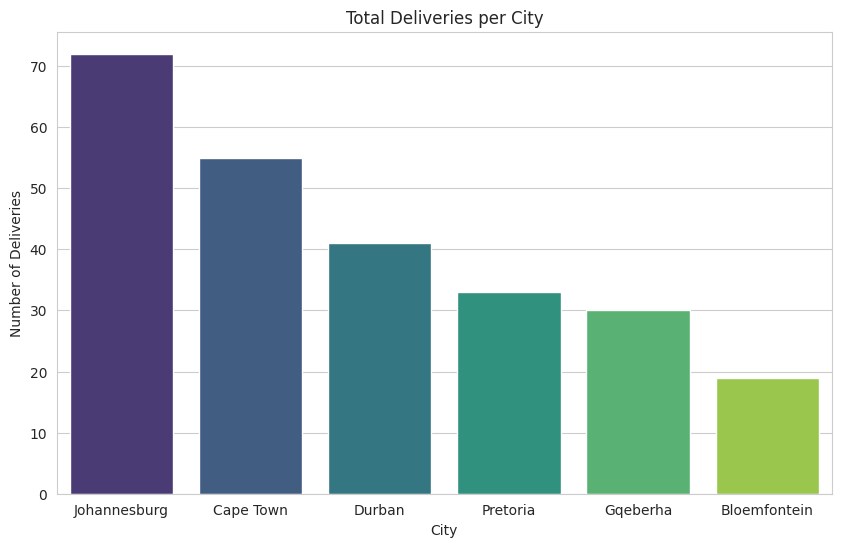

In [56]:
deliveries_per_city = pd.read_sql("""
    SELECT city, COUNT(*) AS num_deliveries
    FROM deliveries
    GROUP BY city
    ORDER BY num_deliveries DESC
""", conn)

sns.barplot(x='city', y='num_deliveries', data=deliveries_per_city, palette='viridis')
plt.title('Total Deliveries per City')
plt.ylabel('Number of Deliveries')
plt.xlabel('City')
plt.show()


/tmp/ipython-input-346090263.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='carrier', y='avg_delay', data=avg_delay_carrier, palette='magma')


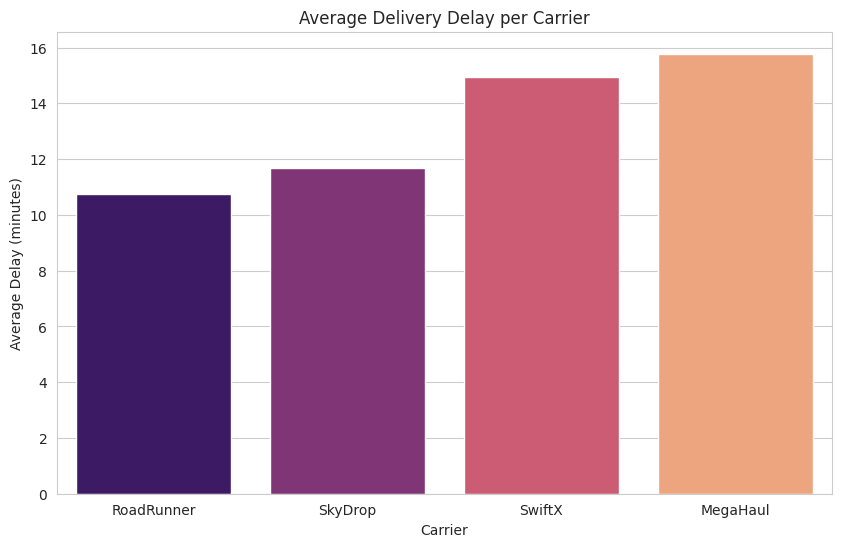

In [57]:
avg_delay_carrier = pd.read_sql("""
    SELECT carrier, AVG(delay_minutes) AS avg_delay
    FROM deliveries
    GROUP BY carrier
    ORDER BY avg_delay
""", conn)

sns.barplot(x='carrier', y='avg_delay', data=avg_delay_carrier, palette='magma')
plt.title('Average Delivery Delay per Carrier')
plt.ylabel('Average Delay (minutes)')
plt.xlabel('Carrier')
plt.show()


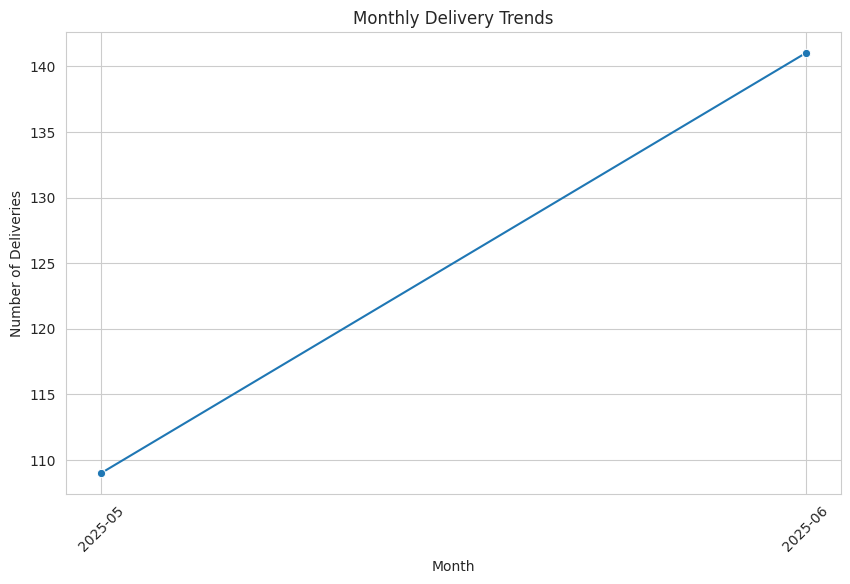

In [60]:
monthly_trends = pd.read_sql("""
    SELECT strftime('%Y-%m', scheduled_datetime) AS month, COUNT(*) AS deliveries_count
    FROM deliveries
    GROUP BY month
    ORDER BY month
""", conn)

sns.lineplot(x='month', y='deliveries_count', data=monthly_trends, marker='o')
plt.title('Monthly Delivery Trends')
plt.ylabel('Number of Deliveries')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3662172065.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='delivery_id', y='distance_km', data=longest_deliveries, palette='coolwarm')


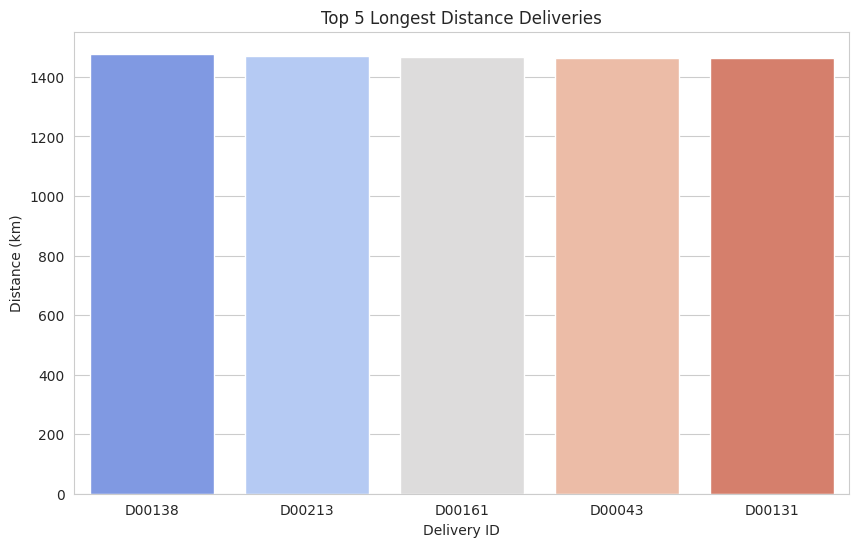

In [61]:
longest_deliveries = pd.read_sql("""
    SELECT delivery_id, distance_km
    FROM deliveries
    ORDER BY distance_km DESC
    LIMIT 5
""", conn)

sns.barplot(x='delivery_id', y='distance_km', data=longest_deliveries, palette='coolwarm')
plt.title('Top 5 Longest Distance Deliveries')
plt.ylabel('Distance (km)')
plt.xlabel('Delivery ID')
plt.show()


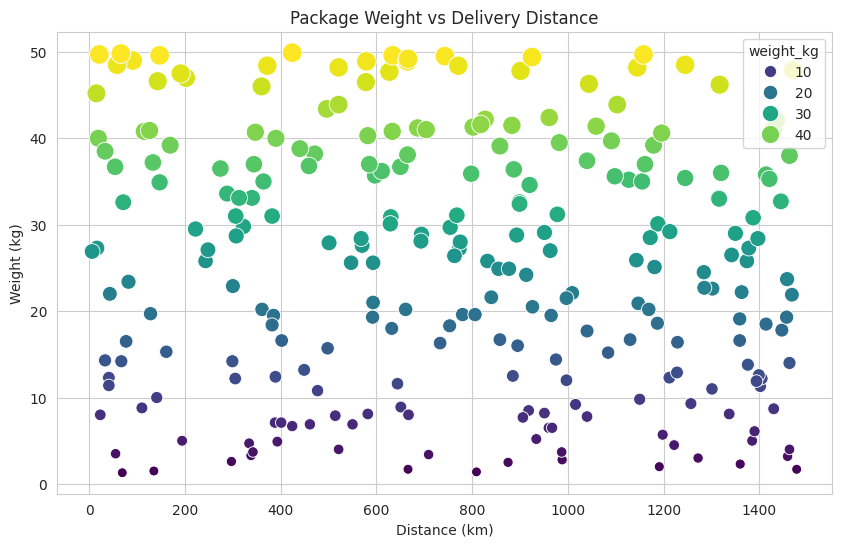

In [62]:
deliveries_data = pd.read_sql("SELECT distance_km, weight_kg FROM deliveries", conn)

sns.scatterplot(x='distance_km', y='weight_kg', data=deliveries_data, hue='weight_kg', palette='viridis', size='weight_kg', sizes=(50,200))
plt.title('Package Weight vs Delivery Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Weight (kg)')
plt.show()
